<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/detectron2-colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=bjay7fT934Y

In [ ]:
# !pip install pyyaml==5.1

In [1]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 13 kB/s 
     |████████████████████████████████| 12.8 MB 82 kB/s 
     |████████████████████████████████| 7.6 MB 5.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Successfully uninstalled torchvision-0.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.7.1+cu101 which is incompatible.


In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

### Runtime restart!!! 

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


### Import Detectron2 and Run Inferencing

In [2]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

In [3]:
%cd /content/

/content


In [4]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -q -O input.jpg

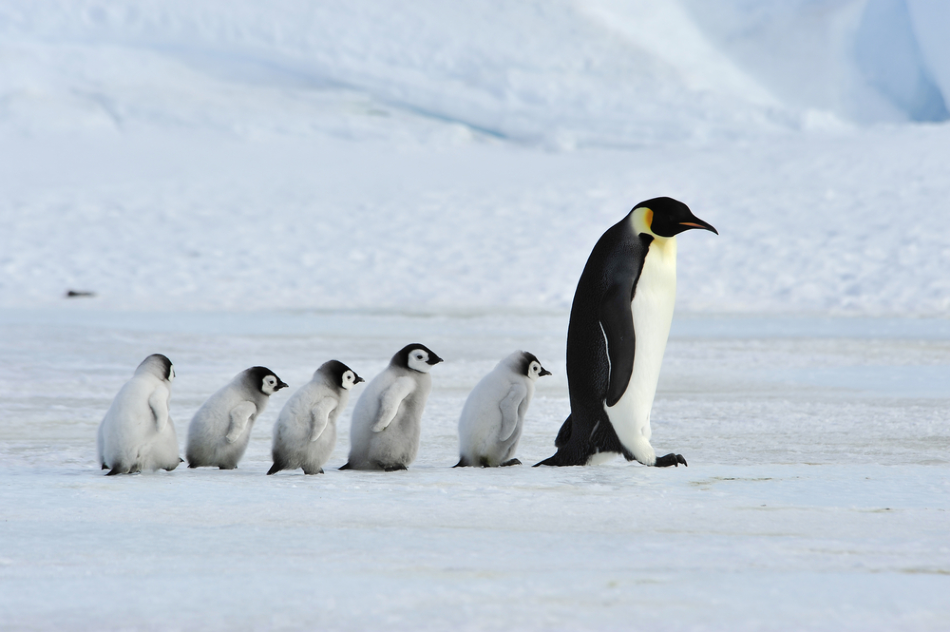

In [17]:
image = cv2.imread('./penguins.png')
cv2_imshow(image)

In [ ]:
#cfg.MODEL.DEVICE = "cpu"

In [18]:
cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model

cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

In [19]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [20]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([14, 14, 14, 14, 14, 14], device='cuda:0')
Boxes(tensor([[183.9222, 364.5638, 289.7276, 472.3306],
        [337.3337, 345.0240, 444.8876, 472.0437],
        [450.4389, 347.2269, 553.6845, 468.8347],
        [268.1128, 357.6290, 358.6227, 477.8799],
        [538.5643, 196.3653, 718.0367, 470.7869],
        [ 95.8656, 352.4139, 184.3270, 475.7076]], device='cuda:0'))


In [21]:
viz = Visualizer(image[:, :, ::-1],
            metadata=MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
            #scale=1, 
            #instance_mode= 1 # ColorMode.SEGMENTATION 
)

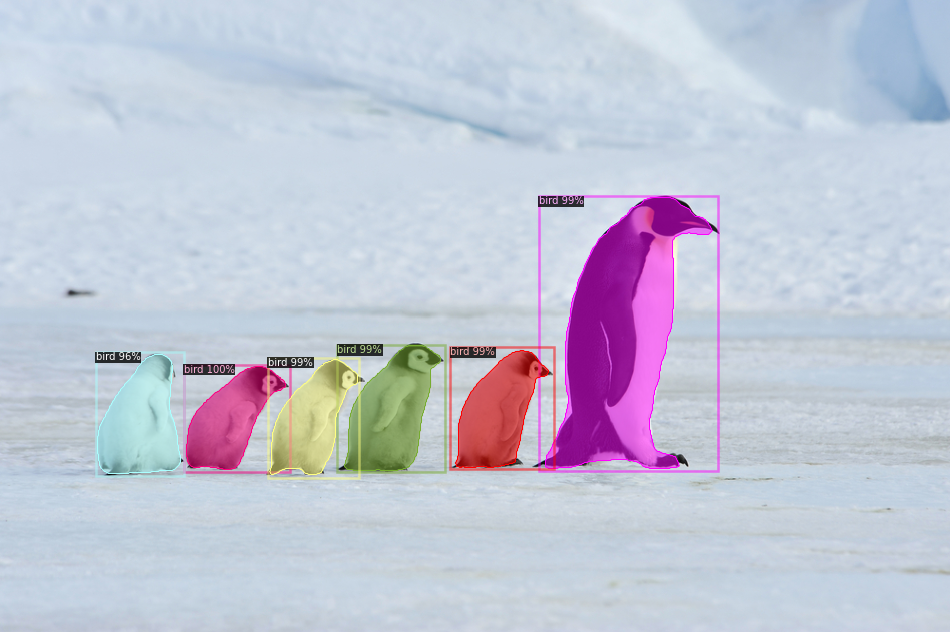

In [22]:
output = viz.draw_instance_predictions(outputs['instances'].to('cpu'))
cv2_imshow(output.get_image()[:, :, ::-1])